WELCOME TO IMAGE RECOGNITION

In [1]:
print("hello")

hello


In [2]:
! pip install keras

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 202.0 kB/s eta 0:00:0000:0100:01


In [3]:
! pip install sklearn


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2360 sha256=0fcc034c5c8e8db49db24ec52bd2e228ec2261c26687d2bdfb52d3e523b59abf
  Stored in directory: /home/lee/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built sklearn


In [5]:
! pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 795.2 kB/s eta 0:00:0000:0100:15
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 644.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 751.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 991.3 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 KB 555.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 933.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 920.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 1.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 KB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 KB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━

In [1]:
from keras.datasets import mnist
import numpy as np;
import matplotlib.pyplot as plt;

(X_train, y_train), (X_test, y_test) = mnist.load_data()

2023-09-04 19:25:08.792640: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-04 19:25:08.833638: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-04 19:25:09.181016: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-04 19:25:09.183234: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-04 19:25:10.157581: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
X_train.shape

(60000, 28, 28)

In [3]:
X_train = X_train.reshape((-1,28,28,1))
X_test = X_test.reshape((-1,28,28,1))

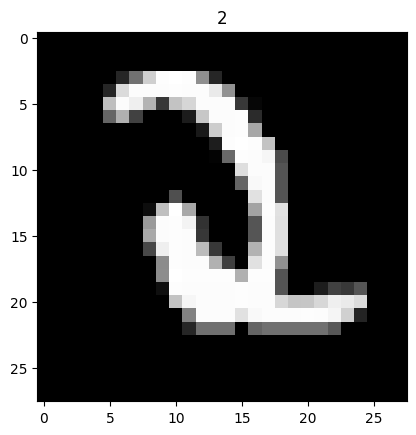

In [4]:
plt.imshow(X_train[400], cmap="gray")
plt.title(y_train[400])
plt.show()

In [5]:
X_train.shape

(60000, 28, 28, 1)

In [6]:
X_train = X_train.reshape((-1,28,28,1))

In [7]:
## creating model
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
from keras.models import Sequential
model=Sequential()
model.add(Conv2D(filters=4, kernel_size=(5,5),activation='relu' , input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=4, kernel_size=(7,7),activation='relu' ))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['acc'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 4)         104       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 4)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 4)           788       
                                                                 
 average_pooling2d_1 (Avera  (None, 3, 3, 4)           0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 36)                0         
                                                                 
 dense (Dense)               (None, 10)                3

In [10]:
model.fit(X_train,y_train, epochs=1, batch_size=1 )

60000/60000 [==============================] - 84s 1ms/step - loss: 0.2658 - acc: 0.9200


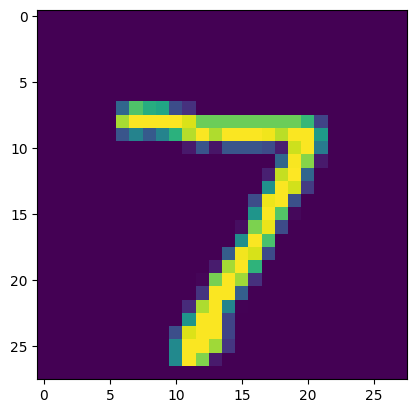

In [11]:
plt.imshow(X_test[0])

In [14]:
test= X_test[0].reshape(-1,28,28,1)
model.save("./my_model.h5")


/home/lee/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
